In [2]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time (1).csv


In [3]:
#Importing data
import pandas as pd
import numpy as np
df = pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
#Knowing The data
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
df.duplicated().sum()

0

<ipython-input-11-78b318250dd9>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


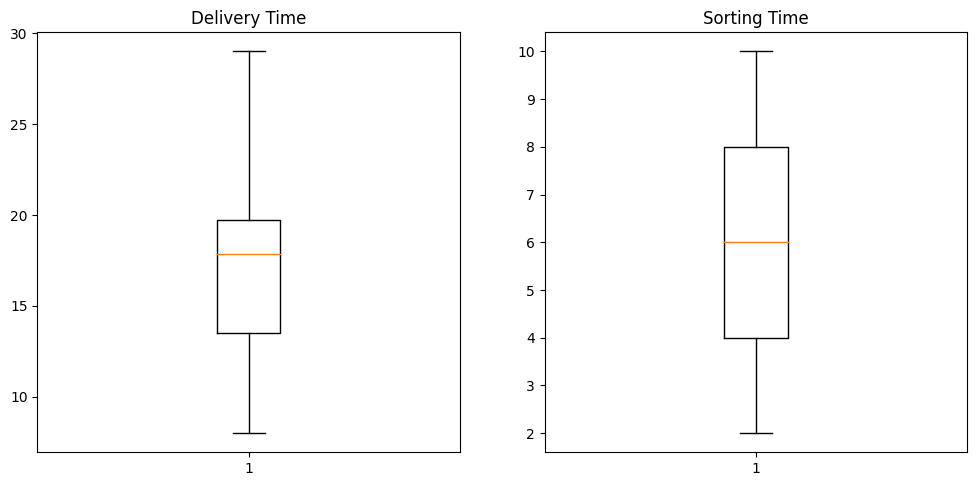

In [11]:
#Exploratory Data Analysis
#Boxplot
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,12))
plt.subplot(221)
plt.boxplot(df['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(222)
plt.boxplot(df['Sorting Time'])
plt.title('Sorting Time')
plt.show()

<ipython-input-12-3fd7851cc0fd>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


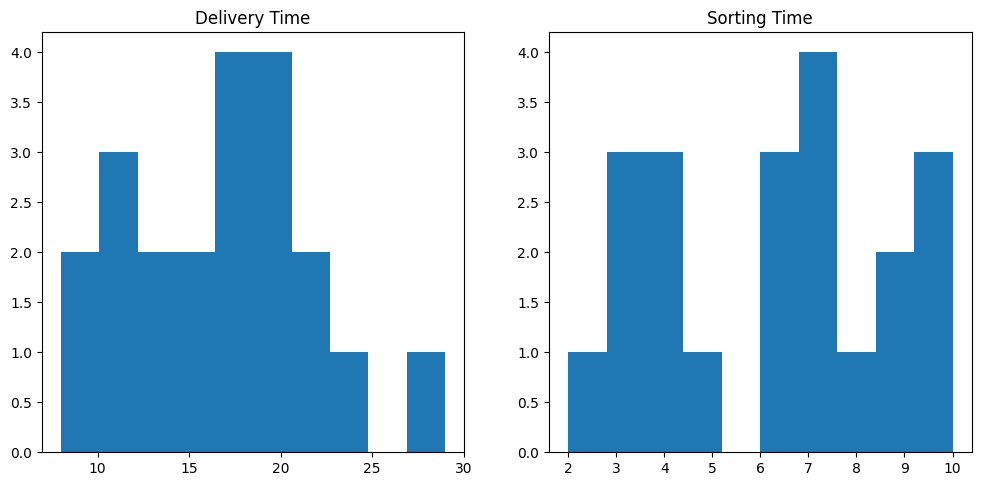

In [12]:
#Histogram
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,12))
plt.subplot(221)
plt.hist(df['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(222)
plt.hist(df['Sorting Time'])
plt.title('Sorting Time')
plt.show()

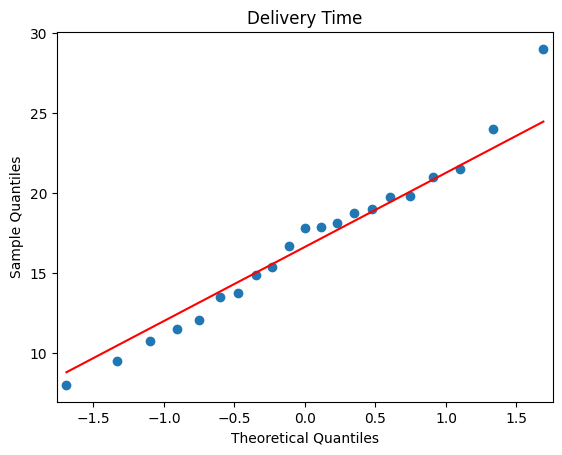

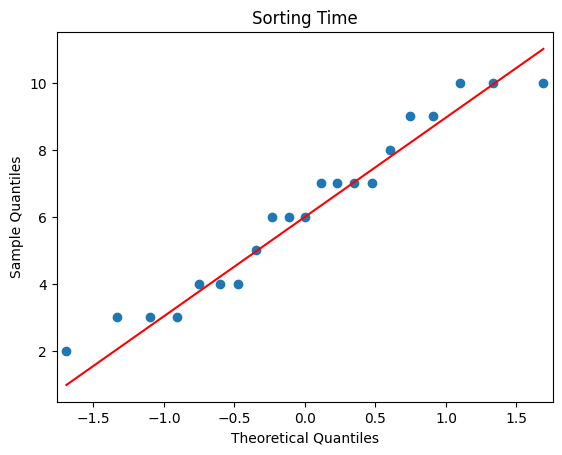

In [13]:
#Q-Q PLot
import statsmodels.api as sm
sm.qqplot(df['Delivery Time'], line = 'q')
plt.title('Delivery Time')
sm.qqplot(df['Sorting Time'], line = 'q')
plt.title('Sorting Time')
plt.show()

In [14]:
x = df['Sorting Time']
y = df['Delivery Time']

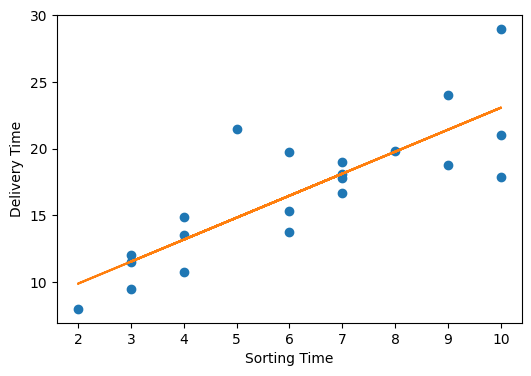

In [16]:
#Scatter Plot
from numpy.polynomial.polynomial import polyfit
plt.figure(figsize=(6,4))
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.scatter(x,y)
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()


In [18]:
cor = np.corrcoef(x, y)
cor

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

Correlation Between Delivery Time and Sorting Time is 82.59%bold text

**Simple Linear Regression With Data Transformations**


1.   X,Y
2.   LogX,Y
3.   X,LogY
4.   LogX,LogY
5.   X_Square,Y
6.   X,Y_Square
7.   X_Square,Y_Square
8.   Squareroot_X,Y
9.   X,Squareroot_Y
10.   Squareroot_X,Squareroot_Y





In [19]:
# X,Y
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    6.12e-15
Time:                        13:14:18   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#Log_X,Y
x_log = np.log(df['Sorting Time'])

In [23]:
model = sm.OLS(y, x_log).fit()
predictions = model.predict(x_log)

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              791.0
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    1.48e-17
Time:                        13:15:15   Log-Likelihood:                         -51.035
No. Observations:                  21   AIC:                                      104.1
Df Residuals:                      20   BIC:                                      105.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     9.6706      0.344     28.124      0.000       8.953      10.388
==============================================================================
Omnibus:                        3.656   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.164
Skew:                           0.772   Prob(JB):                        0.339
Kurtosis:                       3.298   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#X,Log_Y
y_log = np.log(df['Delivery Time'])

In [26]:
model = sm.OLS(y_log, x).fit()
predictions = model.predict(x)

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              219.7
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    3.00e-12
Time:                        13:16:27   Log-Likelihood:                         -25.284
No. Observations:                  21   AIC:                                      52.57
Df Residuals:                      20   BIC:                                      53.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     0.4008      0.027     14.821      0.000       0.344       0.457
==============================================================================
Omnibus:                        2.572   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.346
Skew:                          -0.275   Prob(JB):                        0.510
Kurtosis:                       1.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#Log_X,Log_Y
model = sm.OLS(y_log, x_log).fit()
predictions = model.predict(x_log)

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    5.72e-17
Time:                        13:17:13   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#Square_X,y
x_sqr = (df['Sorting Time'])**2
x_sqr

0     100
1      16
2      36
3      81
4     100
5      36
6      49
7       9
8     100
9      81
10     64
11     16
12     49
13      9
14      9
15     16
16     36
17     49
18      4
19     49
20     25
Name: Sorting Time, dtype: int64

In [40]:
model = sm.OLS(y, x_sqr).fit()
predictions = model.predict(x_sqr)

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.824
Method:                 Least Squares   F-statistic:                              99.65
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    3.26e-09
Time:                        13:21:47   Log-Likelihood:                         -71.129
No. Observations:                  21   AIC:                                      144.3
Df Residuals:                      20   BIC:                                      145.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     0.2932      0.029      9.982      0.000       0.232       0.354
==============================================================================
Omnibus:                        4.208   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                2.561
Skew:                          -0.836   Prob(JB):                        0.278
Kurtosis:                       3.362   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#X,Square_y
y_sqr = (df['Delivery Time'])**2
y_sqr

0     441.0000
1     182.2500
2     390.0625
3     576.0000
4     841.0000
5     235.6225
6     361.0000
7      90.2500
8     320.4100
9     351.5625
10    393.2289
11    115.5625
12    278.2224
13    132.2500
14    144.7209
15    221.4144
16    189.0625
17    327.9721
18     64.0000
19    317.9089
20    462.2500
Name: Delivery Time, dtype: float64

In [43]:
model = sm.OLS(y_sqr, x).fit()
predictions = model.predict(x)

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.855
Method:                 Least Squares   F-statistic:                              124.8
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    4.77e-10
Time:                        13:23:20   Log-Likelihood:                         -132.28
No. Observations:                  21   AIC:                                      266.6
Df Residuals:                      20   BIC:                                      267.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     6.0336      0.540     11.170      0.000       4.907       7.160
==============================================================================
Omnibus:                        2.882   Durbin-Watson:                   1.146
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                1.206
Skew:                          -0.360   Prob(JB):                        0.547
Kurtosis:                       3.927   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#Square_X,Square_Y

In [46]:
model = sm.OLS(y_sqr, x_sqr).fit()
predictions = model.predict(x_sqr)

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.855
Method:                 Least Squares   F-statistic:                              124.8
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    4.77e-10
Time:                        13:24:19   Log-Likelihood:                         -132.28
No. Observations:                  21   AIC:                                      266.6
Df Residuals:                      20   BIC:                                      267.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     6.0336      0.540     11.170      0.000       4.907       7.160
==============================================================================
Omnibus:                        2.882   Durbin-Watson:                   1.146
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                1.206
Skew:                          -0.360   Prob(JB):                        0.547
Kurtosis:                       3.927   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#Squareroot_X,Y
x_sqrt = np.sqrt(df['Sorting Time'])

In [49]:
model = sm.OLS(y, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              772.0
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    1.88e-17
Time:                        13:25:38   Log-Likelihood:                         -51.284
No. Observations:                  21   AIC:                                      104.6
Df Residuals:                      20   BIC:                                      105.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     6.9466      0.250     27.785      0.000       6.425       7.468
==============================================================================
Omnibus:                        6.818   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.599
Skew:                           1.090   Prob(JB):                        0.100
Kurtosis:                       3.708   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#X,Squareroot_Y
y_sqrt = np.sqrt(df['Delivery Time'])

In [53]:
model = sm.OLS(y_sqrt, x).fit()
predictions = model.predict(x)

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.767
Model:                            OLS   Adj. R-squared (uncentered):              0.755
Method:                 Least Squares   F-statistic:                              65.69
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    9.52e-08
Time:                        13:27:02   Log-Likelihood:                         -44.139
No. Observations:                  21   AIC:                                      90.28
Df Residuals:                      20   BIC:                                      91.32
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     0.0658      0.008      8.105      0.000       0.049       0.083
==============================================================================
Omnibus:                        2.678   Durbin-Watson:                   1.039
Prob(Omnibus):                  0.262   Jarque-Bera (JB):                2.237
Skew:                          -0.733   Prob(JB):                        0.327
Kurtosis:                       2.362   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#Squareroot_X,Squareroot_Y

In [56]:
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    2.10e-20
Time:                        13:28:05   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Summary:**

**Best Model**
From the above transformations Highest R_Square is 98.7% which is Square Root Transformation of X and Y
From the above transformations Highest Adjusted R_Square is 98.7%